In [50]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [51]:
# Creating object for training set DataFrame
House_DF = pd.read_csv('train.csv')

# Displaying first 5 rows of the DataFrame
House_DF.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [52]:
# Gets information about the types of data
House_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [53]:
# Checking for empty row 
House_DF.isna().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [54]:
X0 = House_DF.iloc[:,1:12].values
Y0 = House_DF.iloc[:,-2].values
LR0 = LinearRegression()
LR0.fit(X0,Y0)
print("Intercept is = ", LR0.intercept_)
print("Slope is = ", LR0.coef_)
Y0_pred = LR0.predict(X0)
RMSE0 = np.sqrt(mean_squared_error(Y0,Y0_pred))
print("Root Mean Square Error is found to be = ", RMSE0)

Intercept is =  20.17300751629604
Slope is =  [ 2.18057576e-01  1.79741491e-02  1.51331084e-01 -6.19777615e-01
  9.00548212e+00 -3.94835028e+00  8.27013309e-02  3.55500318e-01
  3.88077020e-03 -2.94501837e-03  1.99147104e-01]
Root Mean Square Error is found to be =  4.169336991775166


<Axes: >

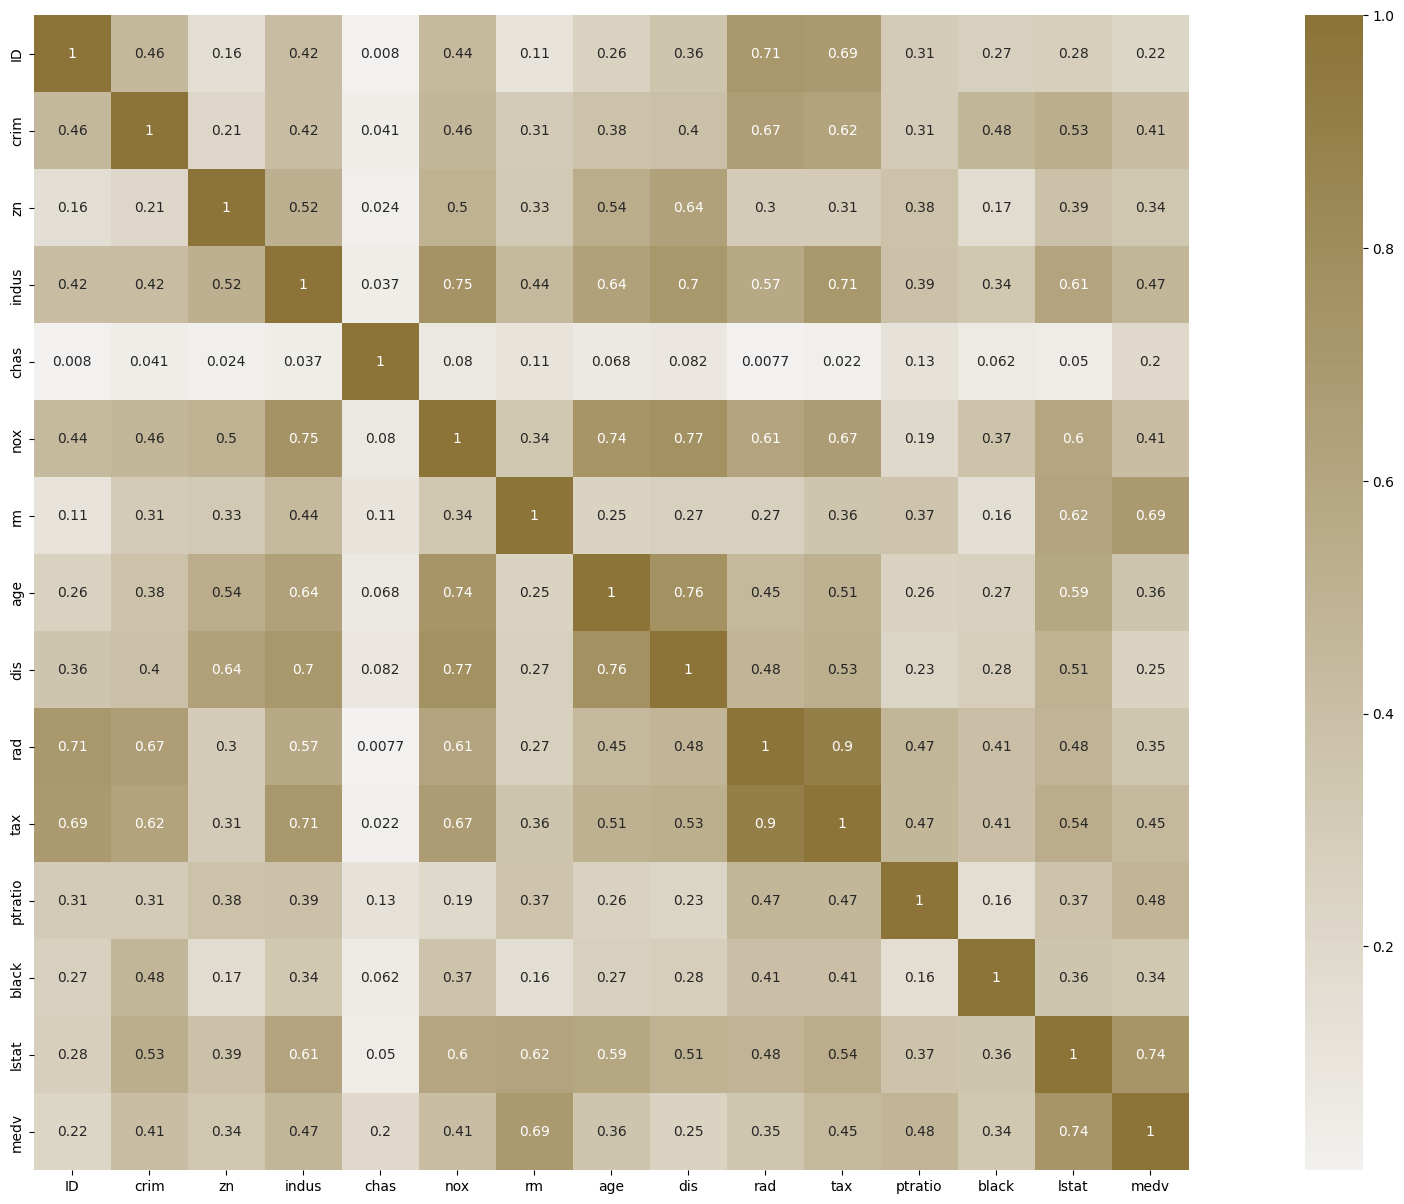

In [55]:
plt.figure(figsize = (30,15))
cmap = sns.diverging_palette(421,64,as_cmap=True)
sns.heatmap(House_DF.corr().abs(),cmap=cmap,center=0,square=True,annot=True)

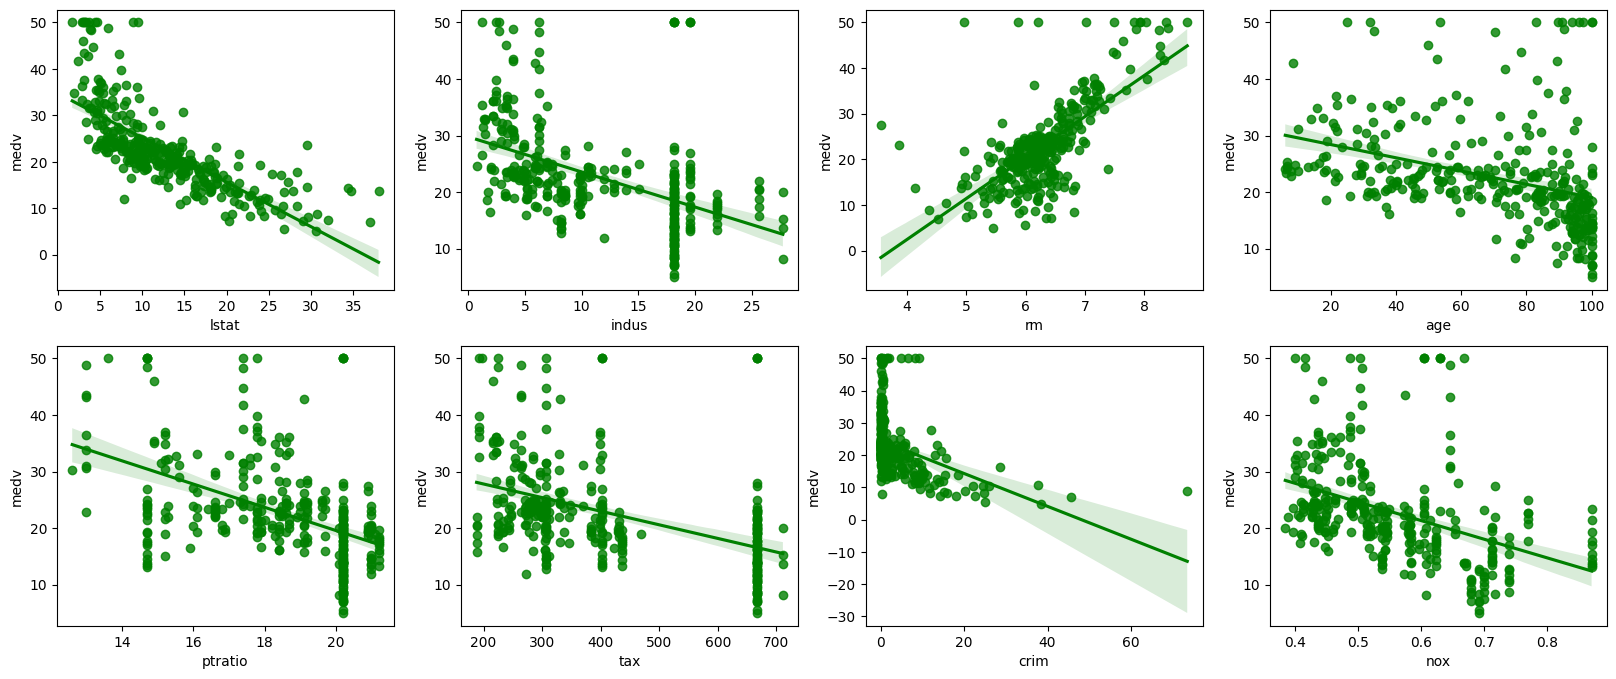

In [56]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(20,8))
cols = ['lstat','indus','rm','age','ptratio','tax','crim','nox']
for col,ax in zip(cols,axs.flat):
    sns.regplot(x=House_DF[col],y=House_DF['medv'],color = 'green',ax=ax)

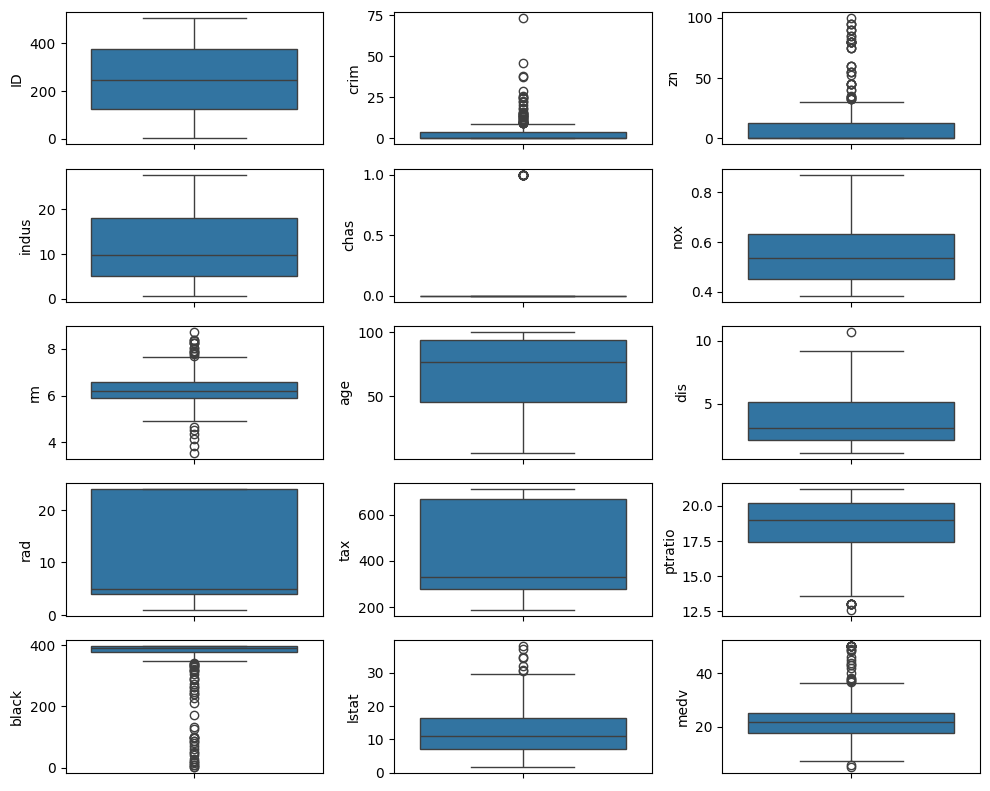

In [57]:
fig, axs = plt.subplots(nrows=5,ncols=3,figsize=(10,8))
index = 0
axs = axs.flatten()
for k,v in House_DF.items():
    sns.boxplot(y=k,data=House_DF,ax=axs[index])
    index+=1
plt.tight_layout()

In [58]:
House_DF=House_DF[~((House_DF['crim']>=20))]
House_DF=House_DF[~((House_DF['rm']>=8.5)|(House_DF['rm']<5))]
House_DF=House_DF[~((House_DF['lstat']>=30))]

In [59]:
X_DF = House_DF[['lstat','indus','rm','age','ptratio','tax','crim','nox']]
X = X_DF.values
X

array([[4.980e+00, 2.310e+00, 6.575e+00, ..., 2.960e+02, 6.320e-03,
        5.380e-01],
       [9.140e+00, 7.070e+00, 6.421e+00, ..., 2.420e+02, 2.731e-02,
        4.690e-01],
       [2.940e+00, 2.180e+00, 6.998e+00, ..., 2.220e+02, 3.237e-02,
        4.580e-01],
       ...,
       [9.080e+00, 1.193e+01, 6.120e+00, ..., 2.730e+02, 4.527e-02,
        5.730e-01],
       [5.640e+00, 1.193e+01, 6.976e+00, ..., 2.730e+02, 6.076e-02,
        5.730e-01],
       [7.880e+00, 1.193e+01, 6.030e+00, ..., 2.730e+02, 4.741e-02,
        5.730e-01]])

In [60]:
Y_DF = House_DF[['medv']]
Y = Y_DF.values
Y

array([[24. ],
       [21.6],
       [33.4],
       [36.2],
       [22.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [20.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [14.8],
       [12.7],
       [14.5],
       [13.5],
       [24.7],
       [30.8],
       [34.9],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [19.4],
       [19.7],
       [20.5],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [18.7],
       [16. ],
       [25. ],
       [33. ],
       [23.5],
       [19.4],
       [22. ],
       [17.4],
       [24.2],
       [22.8],
       [23.4],
       [24.1],
       [21.4],
       [20. ],
       [20.8],
       [28. ],
       [23.9],
       [22.9],
       [23.9],
       [26.6],
       [22.5],
       [22.2],
       [23.6],
       [28.7],
       [22.6],
       [25. ],
       [20.6],
       [21

In [61]:
LR = LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [62]:
print("Intercept is = ", LR.intercept_)
print("Slope is = ", LR.coef_)

Intercept is =  [3.05134642]
Slope is =  [[-5.89188016e-01  1.44695905e-01  6.62541729e+00  4.32294757e-03
  -7.29040436e-01 -4.45829351e-03  3.03776234e-02 -3.04660479e+00]]


In [63]:
Y_pred = LR.predict(X)
print("Predicted Values are given below = \n\n",Y_pred)

Predicted Values are given below = 

 [[30.18255754]
 [26.08819814]
 [32.18007291]
 [31.79652774]
 [22.92473041]
 [20.74161506]
 [22.48128669]
 [20.05812081]
 [20.74575564]
 [20.63969596]
 [19.83711955]
 [21.51522515]
 [15.35482556]
 [10.8925022 ]
 [17.69518617]
 [16.00911956]
 [13.17436629]
 [16.20719363]
 [10.88805293]
 [18.93152241]
 [14.78389924]
 [20.84667351]
 [28.95373691]
 [33.14898425]
 [26.07955674]
 [25.39755805]
 [23.35726688]
 [20.37904432]
 [18.74504006]
 [17.84881822]
 [16.44315061]
 [20.98176575]
 [24.43077406]
 [24.06514927]
 [15.40398901]
 [33.23142191]
 [26.94684519]
 [32.84742267]
 [23.58755382]
 [17.36468584]
 [18.21361652]
 [26.18051673]
 [30.04199993]
 [28.08683088]
 [21.53020544]
 [21.63266322]
 [16.87992873]
 [26.58707732]
 [24.96724627]
 [24.96589655]
 [25.76385581]
 [24.74642598]
 [23.04253004]
 [22.99870881]
 [28.95061177]
 [27.25755662]
 [23.98927288]
 [24.61549954]
 [28.0680373 ]
 [20.21612694]
 [23.573807  ]
 [31.43286529]
 [31.6916566 ]
 [25.48603673]
 [

In [64]:
RMSE = np.sqrt(mean_squared_error(Y,Y_pred))
print("Root Mean Square Error is valued to be = ", RMSE)

Root Mean Square Error is valued to be =  4.575943229158629


In [65]:
Data_DF = pd.read_csv('test.csv')
Data_DF.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [66]:
X_test = Data_DF[['lstat','indus','rm','age','ptratio','tax','crim','nox']].values
Y_test_pred = LR.predict(X_test)
print("Value of x \t\t\t Value of y")
print("\n")
for x, y in zip(Data_DF['ID'],Y_test_pred):
        print(x, y, sep='\t\t\t\t')

Value of x 			 Value of y


3				[34.08381863]
6				[27.13506857]
8				[20.15468971]
9				[10.23777753]
10				[20.2061353]
18				[17.33142075]
20				[17.53176936]
25				[15.98634027]
26				[13.6757799]
27				[16.11000181]
29				[21.83359897]
30				[23.47896035]
33				[9.40303092]
34				[13.31712284]
36				[21.05407308]
37				[19.39685405]
38				[20.92538697]
42				[30.61652289]
49				[6.63514402]
53				[29.31874884]
60				[20.82898777]
63				[25.89017673]
70				[21.32478224]
72				[21.75331466]
79				[22.42184943]
80				[21.88582946]
83				[25.28651282]
92				[25.79942697]
93				[27.44782374]
96				[27.98942447]
98				[39.07278668]
99				[37.62992734]
100				[33.5198505]
105				[19.74434522]
106				[15.24022669]
111				[19.38024194]
113				[17.96105881]
114				[18.64233264]
116				[18.30671647]
126				[21.55104384]
130				[13.89164933]
131				[22.71477245]
133				[23.02025598]
136				[19.33457412]
141				[13.99773549]
144				[11.93551115]
145				[6.45164291]
147				[18.69294085]
152			